In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
sns.set_style("white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def generatekde(file, param):
    prob = pd.read_csv(file)
    prob.columns = ["id","seword","piyungan"]
    prob["date"] = prob["id"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d"))
    prob["sel"] = prob["seword"] - prob["piyungan"]
    prob["daydelta"] = ((prob["date"] - datetime.datetime(2016, 10,5))/7)
    prob["week"]=(prob["daydelta"] / np.timedelta64(1, 'D')).astype(int)
    
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    sns.kdeplot(prob[prob.week==-10]['sel'], ax=ax, label="Ten weeks before", color="purple")
    sns.kdeplot(prob[prob.week==0]['sel'], ax=ax,label="The incident week", color="gray", linestyle="--")
    sns.kdeplot(prob[prob.week==10]['sel'], ax=ax, label="Ten weeks after", color="orange")
    ax.set_xlabel("More Similar to Piyungan    Neutral     More Similar to Seword")
    ax.set_title("KDE of Posteriors: " +param, fontweight="bold", fontsize=16)
    return prob

# KDE of Posterior Differences

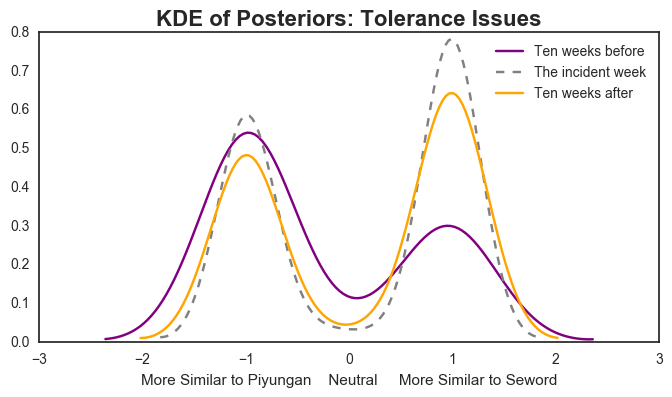

In [4]:
prob2 = generatekde("theprobs_2.csv","Tolerance Issues")

# test significancy

In [7]:
from scipy import stats
d1= prob2[prob2.week==10]['sel']
d2= prob2[prob2.week==0]['sel']
d3= prob2[prob2.week==-10]['sel']
print stats.ks_2samp(d3, d2)
print stats.ks_2samp(d1, d2)
print stats.ks_2samp(d3, d1)

Ks_2sampResult(statistic=0.24404639553663193, pvalue=0.0068670353502451424)
Ks_2sampResult(statistic=0.025786429679785616, pvalue=0.99959370513017543)
Ks_2sampResult(statistic=0.25626250500200082, pvalue=0.0071640509026843942)


# plot across time

In [18]:
ta = pd.read_csv("dft.csv")
dft = ta.groupby(["source","week"]).mean()
dft = dft.reset_index()

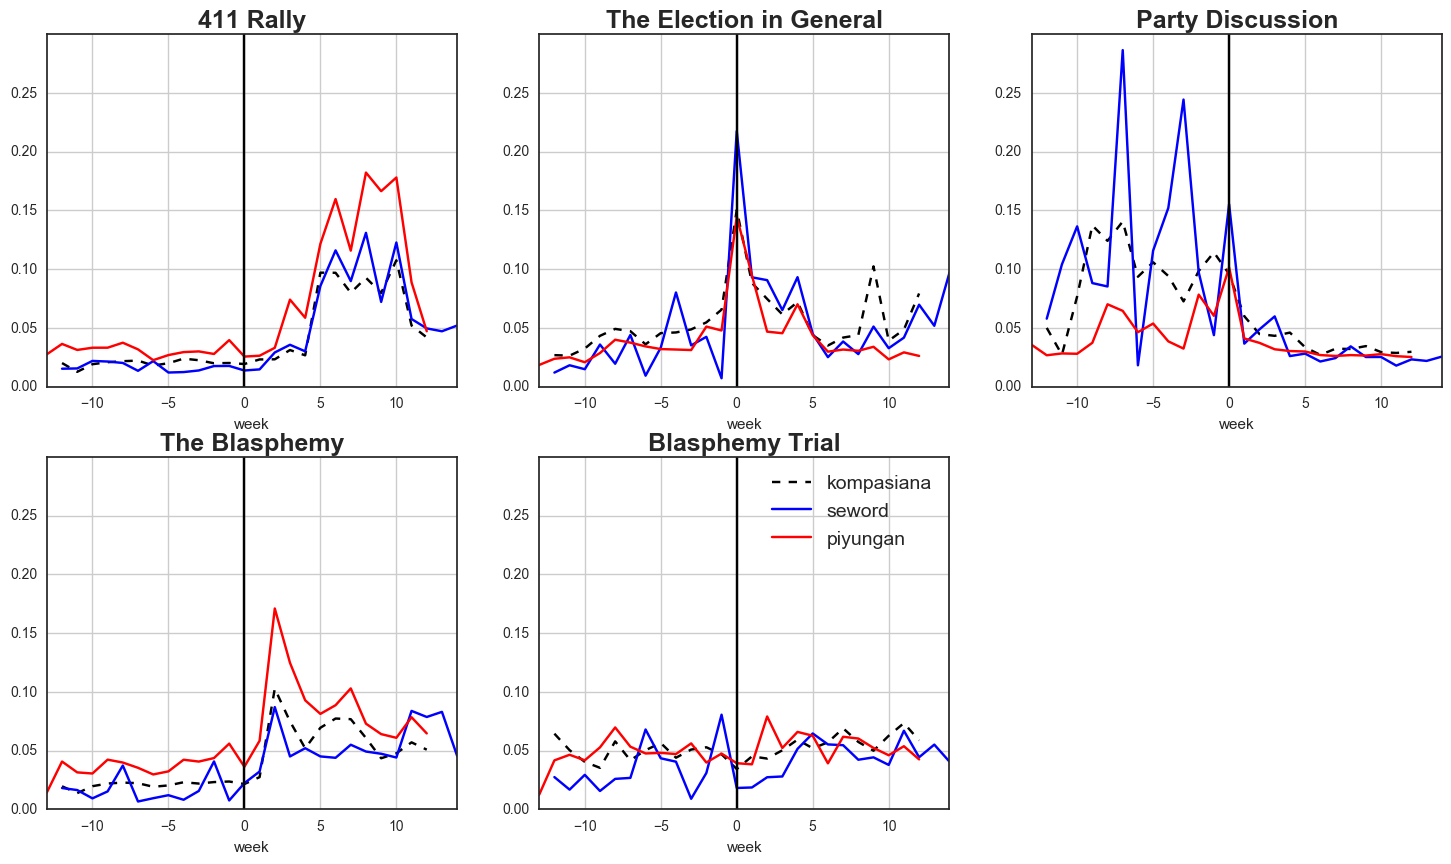

In [62]:
titles = ["411 Rally","The Election in General", "Party Discussion","The Blasphemy", "Blasphemy Trial"]
cols = ["1","9","8","17","15"]
fig = plt.figure(figsize=(18,10))
for i in range(5):
    ax = fig.add_subplot(231+i)
    df = dft[['source','week',cols[i]]].pivot('week','source')
    df = df.xs(cols[i], axis=1, drop_level=True)
    df.kompasiana.plot(c='k', linestyle='--', label='kompasiana')
    df.seword.plot(c='b', label='seword')
    df.piyungan.plot(c='r',label='piyungan')
    ax.set_title(titles[i], fontsize=18, fontweight='bold')
    plt.axvline(0, color='k', linestyle='solid')
    ax.set_ylim(0,0.3)
    plt.grid()
    if i == 4:
        ax.legend(fontsize=14)